# Linear Regression

### Notes from Chapter 3 of ISLR

Linear regression: very simple approach for supervised learning, used for predicting a quantitative response.

Old, might seem dull but very useful! Good starting point for other approaches.

In [3]:
from pathlib import Path
import pandas as pd

In [2]:
files = Path('./data/')

In [6]:
df = pd.read_csv(files / "Advertising.csv", usecols=['TV', 'radio', 'newspaper', 'sales'])    

In [7]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

We will study the Advertising data set, where the sales show the sales in thousands for a product as a function of advertising budgets in thousands for TV, radio and newspaper. 

- Goal: suggest a marketing plan to result in high product sales for next year.

Few questions we might like to ask:
1. Is there relationship between advertising budget and sales ?
2. How strong is the relationship?
3. Which media contributes to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accuratley can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

## Simple Linear Regression

straighforward approach for predicting a quantitative response $Y$ from a single response variable $X$. It assumes there is a linear relationship between $Y$ and $X$. 

Mathematically: $Y \approx \beta_0 + \beta_1 X$

Example: $sales \approx \beta_0 + \beta_1 TV$ 

Coefficients $\beta_0$ is the intercept and $\beta_1$ is the slope in the linear model. they are the model parameters. 

We use training data to predict $\hat \beta_0$ and $\hat \beta_1$ and then can predict future sales on the basis of a value of TV advertising as :

$ \hat y= \hat \beta_0 + \hat \beta_1 x $

#### Estimating coefficients

By using the training data of the form $(x_0, y_0), (x_1, y_1), \cdots, (x_n, y_n)$ our goal is to predict the coefficients such that we can find a slope and intercept of a line which is as close to the n data points as possible.

Closeness can be defined in many ways, but the most common way is to minimise the least squares.

Let $ \hat y_i= \hat \beta_0 + \hat \beta_1 x_i $ be the prediction on the ith value of X. Then $e_i = y_i - \hat y_i$ is the ith residual. That is the difference between the actual response and the predicted response. 

Residual sum of squares (RSS) = $e_1^2 + e_2^2 + \cdots + e_n^2$. By substituting the valye of $\hat y_i$, least squares chooses $\bets_0, \beta_1$ to minimise RSS.

$ \hat \beta_1 = \frac {\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}$

$\beta_0 = \bar y - \hat \beta_1 \bar x$

In [22]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [12]:
model = LinearRegression()

In [18]:
model.fit(df.TV[:, None], df.sales[:, None])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
preds = model.predict(df.TV[:, None])

In [19]:
model.coef_

array([[0.04753664]])

In [20]:
model.intercept_

array([7.03259355])

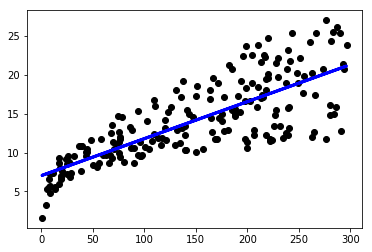

In [26]:
plt.scatter(df.TV, df.sales,  color='black')
plt.plot(df.TV, preds, color='blue', linewidth=3)

#### Assessing the accuracy of the coefficient estimates

True relationship between $Y and X$ is $Y = f(X) + \epsilon$. We approximated $f$ by a linear function, therefore $Y = \beta_0 +  \beta_1 X + \epsilon$.
$\beta_0 $ is the intercept, expected value of Y when X is 0.
$\beta_1 $ is the slope which is the average increase in Y associated with a one-unit increase in X.

Error: catches everything we miss with a simple model.

Blue line is least squares regression line. Population regression line is the true regression line which is unobserved.

We can use several data sets to compute different least squares lines. This is akin to taking different sample data sets to estimate some statistic such as mean. In this case we can estimate the coefficients by taking many samples. Thus this is an unbiased estimate. 

How far is a single estimate from the true value? To compute this we calculate the standard error SE. $Var(\hat \mu ) = SE(\hat y)^2 = \frac{\sigma^2}{n}$

SE tells average amount the estimate $\hat \mu$ is from $\mu$. Also it tells us that how this deviation shrinks with n. Larger the number of n, the smaller the standard error. We can do something similar to compute the standard errors for $\beta_0, \beta_1$, how far they will be from true coefficients.

Using the standard errors we can compute confidence intervals for the coefficients. 95% confidence intervals can be computed for $\beta_0, \beta_1$. $\hat \beta_1 \pm 2 \cdot \beta_1$ and $\hat \beta_0 \pm 2 \cdot \beta_0$

SE can also be used for hypothesis testing:

Null hypothesis: there is no relation between X and Y. Mathematically: $\beta_1 = 0$
Alternative: there is some relation between X and Y. mathematically $\beta_1 \neq 0$

To test this, we need to test if $\beta_1$ is sufficiently far from 0, so that we are confident it is not 0. How far does it need to be for us to be confident? This depends on the accuracy of $\hat \beta_1$, that is the SE. If SE is small, then even with small values of $\hat \beta_1$ we can be confident that $\beta_1 \neq 0$, while if Se is large then $\beta_1$ must be large for us to reject the null hypothesis. We do this by computing the test statistic $t = (\hat \beta_1 - 0)/ Se(\hat \beta_1)$, which measures the number of std devs $\beta_1$ is away from 0. If there is no relation then t will have a t-distribution with n-2 degrees of freedom. We can compute the p-value that is the probability of observing a number equal to t or larger in absolute value.

#### Assessing the accuracy of the model

Once we have rejected the null hypothesis, we want to quantify the extent to which the model fits the data. This is done using residual standard error and the $R^2$ statistic.

1. Residual standard error: is an estimate of standard deviation of $\epsilon$. Average amount that the response will deviate from the true regression line. $RSS = \sqrt(\frac {1}{n-2} RSS)$. It is a measure of lack of fit of model to the data. 

2. $R^2$ statistic: RSE absolute measure of lack of fit of the model but it is measured in units of Y, and it is not always clear on what constitutes a good RSE. $R^2$ is an alternative, which gives the proportion of variance explained. always between 0-1. $R^2 = \frac {TSS - RSS}{TSS}$, where TSS is the total sum of squares. this metric has interpretational advantage. 

## Multiple Linear Regression

What do we do if we have more than one predictor? One option is to run separate regressions for each predictors. But it becomes difficult to use these for prediction due to different lines. Also, they all ignore each other. 

We can extend the simple linear model to accommodate multiple predictors. we can do this as:


$Y = \beta_0 + \beta_1X_1 + \beta_2X_2, \cdots$


#### Estimating the regression coefficients

the parameters are estimated using the same least squares approach.

Some questions:
1. is at least one of the predictors useful in predicting the response?
2. Do all predictors help to explain Y or only a subset is needed?
3. How well does model fit the data?
4. Given a set of predictros, what response should we predict and how accurate is our prediction?

Answers:
1. We need to check if all coefficients are 0. We can use hypothesis test to answer this, where all coefficients are zero vs at least one is non zero. This test is performed using F-statistic. When there is no relation between response and predictors F statistic is close to 1, otherwise it is greater than 1. How small F needs to be is based on n and p. 

2. problem of variable selection, ideally run different models with different variables. Then how do we select which model is best? We use statistics to judge quality of a model. Mallows Cp, Akaike information criteria (AIC), bayesian information criteria (BIC) and adjusted $R^2$. But possible models grows very fast so we have some approaches
- forward selection: start with null model (no intercept), fir p linear models and add to null model the variable with lowest RSS. To this model add variable that results in lowest RSS for the new two variable model. Keep doing this until some stopping rule.
- Backward selection: start with all variables and remove variable with largest p-value. Fit a new model with p-1 variables and remove the varibale with lowest p-value and continue till some stopping rule.
- Mixed: start with null model, add a variable and if at a certain point p value for a variable becomes large remove that variable. keep doing until all variables in model are below some threshold.

3. $R^2$ and RSE are the most common measures for model fit. In simple linear regression $R^$ is sqaures of correlation of response and variable. In multiple linear regression it is square of correlation between response and fitted linear model.

4. Predictions: straightforward to predict response. 3 types of uncertainities
- the plane is an estimate of the true plane. We can compute confidence interval.
- Linear model assumption itself
- random error. We can use prediction intervals. 

### Other considerations


#### Qualitative predictors

Often not all predictors are quantitative.

1. If predictor has only 2 levels: we create a dummy variable with 2 possible oitcomes (0 and 1). Coding has no effect on model but has effect in interpreting the results.

2. More than 2 levels: multiple variables with different 2 levels. 

#### Extensions of linear model

2 main assumptions are made in standard linear regression:

the relationship beteween predictors and response is _additive_ and _linear_

We can relax these assumptions to make more complex models. 

1. Remove additive assumption: We can have interaction between predictors by additing interaction terms. $Y = \beta_0 + \beta_1X1 + \beta_2X_1X_2 + \epsilon$. 

Hierarchical principle: if we include an interaction term, then we should also include the main terms even if p values associated with them are not significant. 

2. Non-linear relationship: one approach is polynomial regression. Use a transformed version of the predictor like $X_i^2$. the model is still linear. 


#### Some issues

1. Non linearity of predictor-response relationship.
2. Correlation of error terms
3. Non-constant variance of error terms.
4. Outliers.
5. High leverage points.
6. Collinearity

Some ways to deal with them:
1. use residual plots to identify non-linearity of data. Presence of a pattern indicates some problem. To get rid of it try to incorporate non-linear transformations.
2. Can cause confidence intervals to be narrower when actually they should not be, giving a false sense of confidence. need to design the experiment better. Usually seen in time series but other cases too. Need experiment design techniques.
3. Can be seen from funnel shape in residual plot. To deal with this, we can transform the variable using a concave function like log or square root. 
4. Outliers cause problems with interpretability of the fit as they cause changes to the values of the metrics of confidence and model fit. Use studentised residuals and remove ones with values greater than 3. 
5. Have unusual values of x, can cause substantial impatc on the fit of the model. Compute the leverage statistic and if it exceeds (P +1 )/n then the point has high leverage.
6. It becomes difficult to identify individual association of response with each variable. Look at correlation matrix, and variance inflation factor. if VIF is > 5 or 10 we have a problem. Drop one of the problem variable or combine the two variables into one. 

#### Comparing linear regression to KNN 

Alternative approach: KNN regression, non-paramtric

related to KNN classifier: given a value of K ad a prediction point, KNN regression finds K data points close to x, then it estimates f(x) by average of training data response.

curse of dimensionality: observations that are nearest to a given observation may be very far away in a p-dimensional space when p is large leading to poor prediction.

In general parametric methods work well when there is small number of observations per predictor.